# Used Car Pricing Algorithm

## Reload Stuff

In [8]:
import pickle
import pandas

In [6]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
train = pd.read_pickle(working_dir + "train.pkl")
validate = pd.read_pickle(working_dir + "validate.pkl")
test = pd.read_pickle(working_dir + "test.pkl")

In [9]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'hpt_model.pickle', 'rb') as f:
    hpt_model = pickle.load(f)

In [10]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_30.pickle', 'rb') as f:
    cb_model_30 = pickle.load(f)
    
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_40.pickle', 'rb') as f:
    cb_model_40 = pickle.load(f)
    
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_50.pickle', 'rb') as f:
    cb_model_50 = pickle.load(f)
    
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_60.pickle', 'rb') as f:
    cb_model_60 = pickle.load(f)
    
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_70.pickle', 'rb') as f:
    cb_model_70 = pickle.load(f)

## Presentation Stuff

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def assess_results(y_test, y_pred):
    print("R2: ", round(r2_score(y_test, y_pred),3))
    print("MAE: ", round(mean_absolute_error(y_test, y_pred),2))
    print("MAPE: ", round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100,1),"%")
    print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    print("Percent Underpayed: ", round(len((y_test - y_pred)[(y_test - y_pred) >= 0]) / len(y_test) * 100,1),"%")
    print("Mean of Underpayment: ", round(np.mean((y_test - y_pred)[(y_test - y_pred) > 0]),2))
    print("Percent Overpayed: ", round(len((y_test - y_pred)[(y_test - y_pred) < 0]) / len(y_test) * 100,1),"%")
    print("Mean of Overpayment: ", round(np.mean((y_test - y_pred)[(y_test - y_pred) < 0]),2))
    print("Mean Error: ", round(np.mean(y_test - y_pred),2)) 
    

In [15]:
selected_num_cols = ['age_months',
                     'mvr_mileage',
                     'mvr_model_year',
                     'doors',
                     'cylinders',
                     'engine_size',
                     'mpg',
                     'make_model_trim_encode',
                     'hvf_opt_comp_0',
                     'hvf_opt_comp_1',
                     'hvf_opt_comp_2',
                     'hvf_opt_comp_3',
                     'hvf_opt_comp_4',
                     'hvf_opt_comp_5',
                     'hvf_opt_comp_6',
                     'hvf_opt_comp_7',
                     'hvf_opt_comp_8',
                     'hvf_std_missing',
                     'hvf_opt_missing',
                    # 'gas_price_index',
                    # 'new_car_price_index',
                     'used_car_price_index',
                     'consumer_sentiment_index',
                     'median_income',
                     'is_certified'
                    ]

selected_cat_cols = ['base_exterior_color',
                     'base_interior_color',
                     'body_type',
                     'drivetrain',
                     'engine_block',
                     'fuel_type',
                     'mvr_purchase_month',
                     'mvr_state',
                     'transmission',
                     'vehicle_type'
                    ]

target = 'mvr_price'

### Model Stats

In [16]:
# predict
hpt_preds = hpt_model.predict(validate[selected_num_cols + selected_cat_cols])

# results
assess_results(validate[target], hpt_preds)

R2:  0.88
MAE:  3074.05
MAPE:  17.6 %
RMSE:  4462.04
Percent Underpayed:  59.2 %
Mean of Underpayment:  3547.36
Percent Overpayed:  40.8 %
Mean of Overpayment:  -2386.01
Mean Error:  1129.19


### Actual vs Predicted

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [168]:
import random
range_end = len(hpt_preds)
sample_size = int(range_end * 0.001) # Calculate the size of the sample
sample = random.sample(range(range_end), sample_size) # Generate the sample

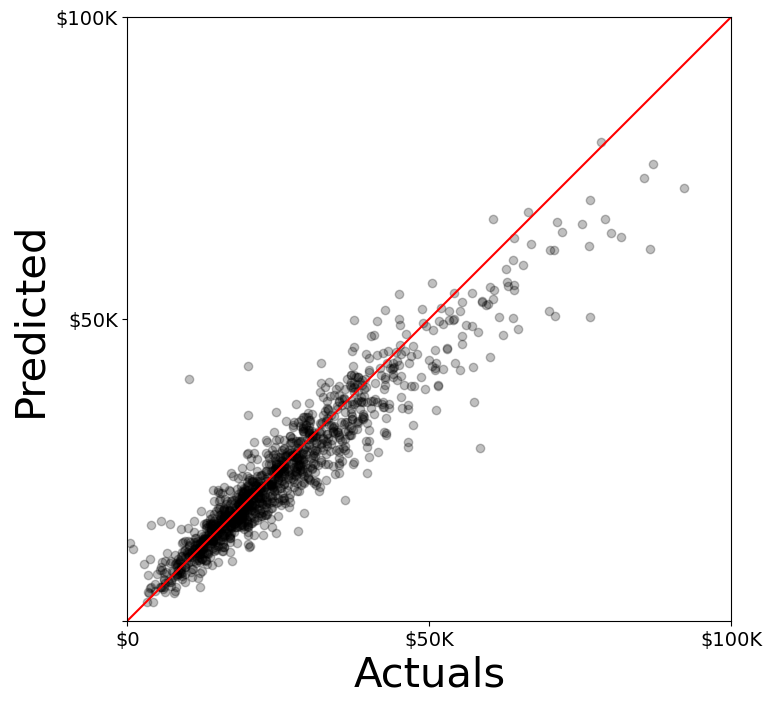

In [181]:
%matplotlib inline

# predicted vs actuals
x = validate[target].reset_index(drop=True)[sample]
y = hpt_preds[sample]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

# Set axis limits and aspect ratio
ax.set_xlim(0, 100000)
ax.set_ylim(0, 100000)
ax.set_aspect('equal')

# Plot points in black
ax.scatter(x, y, color='black', alpha=0.25)

# Plot 45 degree line in red
ax.plot([0, 100000], [0, 100000], color='red')

# Set axis labels
ax.set_xlabel('Actuals', fontsize=30)
ax.set_ylabel('Predicted', fontsize=30)

# Format x-axis and y-axis as dollars
import matplotlib.ticker as mtick
fmt_dollars = mtick.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(fmt_dollars)
ax.yaxis.set_major_formatter(fmt_dollars)

# Show ticks and labels only at $0, $50000, and $100000
ax.set_xticks([0, 50000, 100000])
ax.set_yticks([0, 50000, 100000])
ax.set_xticklabels(['$0', '$50K', '$100K'], fontsize=14)
ax.set_yticklabels(['', '$50K', '$100K'], fontsize=14)

# Show plot
plt.show()


### Demonstrate Range

In [84]:
# predict
cb_30_preds = cb_model_30.predict(validate[selected_num_cols + selected_cat_cols])
cb_40_preds = cb_model_40.predict(validate[selected_num_cols + selected_cat_cols])
cb_50_preds = cb_model_50.predict(validate[selected_num_cols + selected_cat_cols])
cb_60_preds = cb_model_60.predict(validate[selected_num_cols + selected_cat_cols])
cb_70_preds = cb_model_70.predict(validate[selected_num_cols + selected_cat_cols])

In [138]:
price_point = 15000
price_inc = 0.2
vehicles = ((cb_50_preds > price_point) & (cb_50_preds < price_point + price_inc))
sum(vehicles)

6

In [139]:
diffs = cb_70_preds[vehicles] - cb_30_preds[vehicles]
diffs

array([2151.92580548, 2438.04478349, 1515.28044978, 2070.81799289,
       2109.25190992, 2835.33259933])

In [140]:
max_diff_diff = max(diffs) - min(diffs)
max_diff_diff

1320.052149545154

In [148]:
validate[vehicles]

,mvr_price,make,model,trim,mvr_model_year,mvr_mileage,age_months,vehicle_type,body_type,body_subtype,drivetrain,fuel_type,engine_block,engine_size,transmission,doors,cylinders,base_exterior_color,base_interior_color,is_certified,zip,mvr_state,hvf_standard,hvf_optional,mvr_purchase_date,make_model_encode,make_model_trim_encode,mvr_purchase_month,monthly_mileage,mpg,population_density,median_income,median_home_value,mvr_purchase_yearmonth,used_car_price_index,new_car_price_index,gas_price_index,consumer_sentiment_index,hvf_opt_missing,hvf_std_missing,hvf_opt_comp_0,hvf_opt_comp_1,hvf_opt_comp_2,hvf_opt_comp_3,hvf_opt_comp_4,hvf_opt_comp_5,hvf_opt_comp_6,hvf_opt_comp_7,hvf_opt_comp_8,hvf_all_comp_0,hvf_all_comp_1,hvf_all_comp_2,hvf_all_comp_3,hvf_all_comp_4,hvf_all_comp_5,hvf_all_comp_6,hvf_all_comp_7,hvf_all_comp_8,mvr_price_bc
571562,16695.00,Ford,Fiesta,SE,2018,3691.00,20,Car,Sedan,None,FWD,Unleaded,I,2.00,Automatic,4.00,4.00,Black,Black,0.00,78599,TX,"[Keyless Entry/Locking, Brake Assist, Parking ...",None,2019-02-05,11300.62,11141.45,2,184.60,29.95,2011.00,49598.00,133800.00,2019-02,138.80,147.85,2.25,91.20,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.80,-0.28,-0.60,-0.05,0.03,-0.51,0.48,0.48,-0.53,55.46
5572123,15840.00,GENERAL MOTORS,Terrain,Denali,2013,80971.00,89,Truck,SUV,None,FWD,Unleaded,I,2.50,Automatic,5.00,4.00,Black,Black,0.00,44057,OH,None,None,2019-11-11,20364.97,26150.28,11,909.80,23.60,399.00,50648.00,132000.00,2019-11,138.41,145.58,2.63,95.50,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.56
3303914,14595.00,Toyota,Corolla,LE,2017,27985.00,29,Car,Sedan,None,FWD,Unleaded,I,2.00,CVT,4.00,4.00,Silver,Gray,0.00,78758,TX,None,None,2018-10-25,16142.45,16203.82,10,965.00,29.95,4747.00,43537.00,146100.00,2018-10,135.13,145.43,2.84,100.10,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.19
5286198,15750.00,Chevrolet,Malibu Limited,1LT,2016,31048.00,45,Car,Sedan,None,FWD,Unleaded,I,2.00,Automatic,4.00,4.00,White,Black,1.00,45324,OH,"[Keyless Entry/Locking, Brake Assist, Automati...",None,2019-02-20,14889.80,14889.80,2,690.00,29.95,1265.00,43020.00,115400.00,2019-02,138.80,147.85,2.25,91.20,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.01,-0.13,0.87,0.29,0.27,-1.13,-0.58,-0.74,0.19,54.47
589956,20995.00,Jeep,Compass,Sport,2018,43236.00,29,Truck,SUV,None,FWD,Unleaded,I,2.50,Automatic,5.00,4.00,Black,Gray,0.00,78612,TX,"[Keyless Entry/Locking, Brake Assist, Parking ...","[Automatic Transmission, Satellite Radio]",2019-11-06,19778.04,14699.39,11,1490.90,23.60,122.00,63144.00,132700.00,2019-11,138.41,145.58,2.63,95.50,0,0,-0.73,0.14,0.10,-0.18,-0.24,-0.05,0.34,-0.09,0.39,-1.09,-0.62,0.36,-0.52,-0.87,0.04,-0.17,-0.28,0.15,59.55
4958522,15250.00,Ford,Edge,SEL,2014,115406.00,108,Truck,SUV,None,FWD,Unleaded,V,2.50,Automatic,5.00,4.00,White,Black,0.00,44870,OH,"[Brake Assist, Parking distance system, Parkin...",None,2022-05-28,20691.91,20718.91,5,1068.60,23.60,704.00,40944.00,109400.00,2022-05,206.98,169.64,4.11,65.20,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.33,0.39,-0.06,-0.16,0.50,-0.10,-0.17,-0.37,0.52,53.92


### Underbid Percentiles

In [150]:
actuals = validate[target]

In [156]:
sum((actuals - cb_30_preds) > 0)/len(cb_30_preds)

0.7471274888056549

In [183]:
(actuals - cb_30_preds)[((actuals - cb_30_preds) > 0)].mean()

4381.125135182624

In [157]:
sum((actuals - cb_40_preds) > 0)/len(cb_40_preds)

0.6719024284923071

In [184]:
(actuals - cb_40_preds)[((actuals - cb_40_preds) > 0)].mean()

4046.233088094139

### Options

In [142]:
hvf_optional_df = pd.read_pickle(working_dir + "hvf_optional_df.pkl")

In [145]:
len(hvf_optional_df.columns)

77

In [147]:
hvf_all_df = pd.read_pickle(working_dir + "hvf_all_df.pkl")
len(hvf_all_df.columns)

82

In [144]:
train.shape[0] + validate.shape[0] + test.shape[0]

6359824

## Final Test Results

In [185]:
# predict
hpt_preds_test = hpt_model.predict(test[selected_num_cols + selected_cat_cols])

# results
assess_results(test[target], hpt_preds_test)

R2:  0.881
MAE:  3074.26
MAPE:  18.4 %
RMSE:  4450.25
Percent Underpayed:  59.3 %
Mean of Underpayment:  3543.41
Percent Overpayed:  40.7 %
Mean of Overpayment:  -2391.63
Mean Error:  1125.92


In [ ]:
test